[INFO] loading image...
[INFO] loading pre-trained ResNet50 model...
[INFO] making predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
[INFO] 1. chainlink_fence: 100.00%
[INFO] 2. worm_fence: 0.00%
[INFO] 3. street_sign: 0.00%


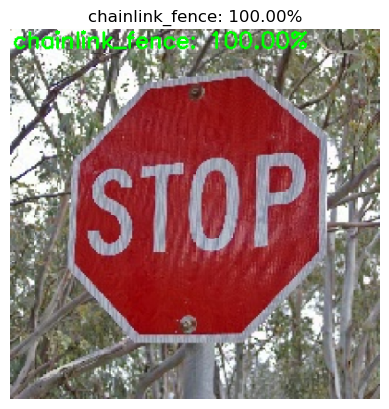

In [1]:
# Import necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import imutils
import cv2
import os
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Swap color channels, preprocess the image, and add in a batch dimension ,,,,
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = preprocess_input(image)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    # Return the preprocessed image
    return image

# Path to the input image
input_image_path = r'C:\Users\lfemu\Downloads\adversarial_stop_sign.jpg'

# Check if the file exists
if not os.path.exists(input_image_path):
    print(f"[ERROR] The file {input_image_path} does not exist.")
else:
    # Load image from disk and make a clone for annotation
    print("[INFO] loading image...")
    image = cv2.imread(input_image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"[ERROR] Failed to load the image {input_image_path}. Please check the file path.")
    else:
        output = image.copy()
        # Preprocess the input image
        output = imutils.resize(output, width=400)
        preprocessedImage = preprocess_image(image)

        # Load the pre-trained ResNet50 model
        print("[INFO] loading pre-trained ResNet50 model...")
        model = ResNet50(weights="imagenet")

        # Make predictions on the input image and parse the top-3 predictions
        print("[INFO] making predictions...")
        predictions = model.predict(preprocessedImage)
        predictions = decode_predictions(predictions, top=3)[0]

        # Loop over the top three predictions
        for (i, (imagenetID, label, prob)) in enumerate(predictions):
            # Print the ImageNet class label ID of the top prediction to our terminal
            print("[INFO] {}. {}: {:.2f}%".format(i + 1, label, prob * 100))

        # Draw the top-most predicted label on the image along with the confidence score
        text = "{}: {:.2f}%".format(predictions[0][1], predictions[0][2] * 100)
        cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Display the output image using matplotlib
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.title(text)
        plt.axis('off')
        plt.show()
